 # <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Recommended Systems Project

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Notebook setup

In [1]:
import os
import numpy as np  
import pandas as pd
import matplotlib, warnings
import seaborn as sns
import re

In [2]:
# Notebook settings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid")

### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> Problem description

* <span style="color:#daad86">DOMAIN: <span style="color:#659dbd">Smartphone, Electronics
* <span style="color:#daad86">CONTEXT: <span style="color:#659dbd">: India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across Indiain the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice

* <span style="color:#daad86">DATA DESCRIPTION: <span style="color:#659dbd"> phone_user_review_file_1...6.csv
* <span style="color:#bc986a">Attribute Information: 
    - <span style="color:#659dbd;font-weight:bold"> author :</span> <span style="color:#659dbd">name of the person who gave the rating
    - <span style="color:#659dbd;font-weight:bold"> country :</span> <span style="color:#659dbd">country the person who gave the rating belongs to
    - <span style="color:#659dbd;font-weight:bold"> data :</span> <span style="color:#659dbd">date of the rating
    - <span style="color:#659dbd;font-weight:bold"> domain :</span> <span style="color:#659dbd">website from which the rating was taken from
    - <span style="color:#659dbd;font-weight:bold"> extract :</span> <span style="color:#659dbd">rating content
    - <span style="color:#659dbd;font-weight:bold"> language :</span> <span style="color:#659dbd">language in which the rating was given
    - <span style="color:#659dbd;font-weight:bold"> product :</span> <span style="color:#659dbd"> name of the product/mobile phone for which the rating was given
    - <span style="color:#659dbd;font-weight:bold"> score :</span> <span style="color:#659dbd">average rating for the phone
    - <span style="color:#659dbd;font-weight:bold"> score_max :</span> <span style="color:#659dbd"> highest rating given for the phone
    - <span style="color:#659dbd;font-weight:bold"> source :</span> <span style="color:#659dbd"> source from where the rating was taken
    
* <span style="color:#daad86">PROJECT OBJECTIVE: <span style="color:#659dbd">We will build a recommendation system using popularity based and collaborative filtering methods to recommend mobile phones to a user which are most popular and personalised respectively..

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Merge the provided CSVs into one data-frame.

In [3]:
# Check the type of encoding 

import chardet
with open('./phone_user_review_file_1.csv',"rb") as f:
    data = f.read()
    print(chardet.detect(data))

{'encoding': 'Windows-1254', 'confidence': 0.4513767255340239, 'language': 'Turkish'}


In [4]:
import sys

encodingList = ['ascii',
 'big5',
 'big5hkscs',
 'cp037',
 'cp273',
 'cp424',
 'cp437',
 'cp500',
 'cp720',
 'cp737',
 'cp775',
 'cp850',
 'cp852',
 'cp855',
 'cp856',
 'cp857',
 'cp858',
 'cp860',
 'cp861',
 'cp862',
 'cp863',
 'cp864',
 'cp865',
 'cp866',
 'cp869',
 'cp874',
 'cp875',
 'cp932',
 'cp949',
 'cp950',
 'cp1006',
 'cp1026',
 'cp1125',
 'cp1140',
 'cp1250',
 'cp1251',
 'cp1252',
 'cp1253',
 'cp1254',
 'cp1255',
 'cp1256',
 'cp1257',
 'cp1258',
 'cp65001',
 'euc_jp',
 'euc_jis_2004',
 'euc_jisx0213',
 'euc_kr',
 'gb2312',
 'gbk',
 'gb18030',
 'hz',
 'iso2022_jp',
 'iso2022_jp_1',
 'iso2022_jp_2',
 'iso2022_jp_2004',
 'iso2022_jp_3',
 'iso2022_jp_ext',
 'iso2022_kr',
 'latin_1',
 'iso8859_2',
 'iso8859_3',
 'iso8859_4',
 'iso8859_5',
 'iso8859_6',
 'iso8859_7',
 'iso8859_8',
 'iso8859_9',
 'iso8859_10',
 'iso8859_11',
 'iso8859_13',
 'iso8859_14',
 'iso8859_15',
 'iso8859_16',
 'johab',
 'koi8_r',
 'koi8_t',
 'koi8_u',
 'kz1048',
 'mac_cyrillic',
 'mac_greek',
 'mac_iceland',
 'mac_latin2',
 'mac_roman',
 'mac_turkish',
 'ptcp154',
 'shift_jis',
 'shift_jis_2004',
 'shift_jisx0213',
 'utf_32',
 'utf_32_be',
 'utf_32_le',
 'utf_16',
 'utf_16_be',
 'utf_16_le',
 'utf_7',
 'utf_8',
 'utf_8_sig',
"idna",
 "mbcs",
 "oem",
 "palmos",
 "punycode",
 "raw_unicode_escape",
 "rot_13",
 "undefined",
 "unicode_escape",
 "unicode_internal",
 "base64_codec",
 "bz2_codec",
 "hex_codec",
 "quopri_codec",
 "uu_codec",
 "zlib_codec"]

for entry in encodingList:
    try:
#         print("Attempting reading data with ", entry)
        df=pd.read_csv('./phone_user_review_file_1.csv' ,encoding=entry, index_col=None, header=0)
        print("The encoding {} issuccessful".format(entry))
        pass
    except Exception as e:
#         print("Oops!", sys.exc_info()[0], "occurred.")
#         print("Trying next entry.")
#         print()
        pass

The encoding cp437 issuccessful
The encoding cp720 issuccessful
The encoding cp737 issuccessful
The encoding cp775 issuccessful
The encoding cp850 issuccessful
The encoding cp852 issuccessful
The encoding cp855 issuccessful
The encoding cp858 issuccessful
The encoding cp860 issuccessful
The encoding cp861 issuccessful
The encoding cp862 issuccessful
The encoding cp863 issuccessful
The encoding cp865 issuccessful
The encoding cp866 issuccessful
The encoding cp1006 issuccessful
The encoding cp1125 issuccessful
The encoding cp1256 issuccessful
The encoding latin_1 issuccessful
The encoding iso8859_2 issuccessful
The encoding iso8859_4 issuccessful
The encoding iso8859_5 issuccessful
The encoding iso8859_9 issuccessful
The encoding iso8859_10 issuccessful
The encoding iso8859_11 issuccessful
The encoding iso8859_13 issuccessful
The encoding iso8859_14 issuccessful
The encoding iso8859_15 issuccessful
The encoding iso8859_16 issuccessful
The encoding koi8_r issuccessful
The encoding koi8_u 

In [5]:
#Read and merge the data into one data frame

import glob
files = glob.glob("./phone_user_review_file_*.csv")
li=[]
for f in files:
    df=pd.read_csv(f,encoding='cp1256', index_col=None, header=0)
    li.append(df)
data = pd.concat(li, axis=0, ignore_index=True)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Check a few observations and shape of the data-frame.

In [6]:
#Check few observations
data.head(20)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versأµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenأ§أ£o na entrega. O aparelho أ© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."
5,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Gostei do produto e entrega ocorreu antes do p...,JCVS,Samsung Smartphone Samsung Galaxy S3 Slim G381...
6,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,8/3/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"أ³timo aparelho, unica coisa ruim أ© a camera ...",Juliana Viana,Samsung Smartphone Samsung Galaxy S3 Slim G381...
7,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,7/29/2015,pt,br,Submarino,submarino.com.br,4.0,10.0,Aparelho muito simples pelo preأ§o que se paga...,Julio cabal,Samsung Smartphone Samsung Galaxy S3 Slim G381...
8,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,7/24/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"excelente produto gostei muito, estou satifeit...",RIVALDO CIOQUETA JUNIOR,Samsung Smartphone Samsung Galaxy S3 Slim G381...
9,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,7/21/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"أˆ um excelente aparelho,leve prأ،tico ....cأ¢...",Dulcili,Samsung Smartphone Samsung Galaxy S3 Slim G381...


In [7]:
#Check the shape of data

print ("Shape of data is : {}".format(data.shape))

Shape of data is : (1415133, 11)


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Round off scores to the nearest integers.

In [8]:
#Apply round off function of pandas series
data['score'] = data['score'].round()

In [9]:
data['score'].unique()

array([ 6., 10.,  8.,  4.,  2.,  9., nan,  7.,  3.,  5.,  1.,  0.])

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Check for missing values. Impute the missing values if there is any.

In [10]:
#Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


In [11]:
#Check for missing values
def missing_check(data):
    total = data.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.T # return the dataframe
missing_check(data)

,score_max,score,author,extract,product,domain,source,country,lang,date,phone_url
Total,63489.000000,63489.000000,63202.000000,19361.000000,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.044864,0.044864,0.044662,0.013681,7.066474e-07,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# replace the missing values with median value.

medianFiller = lambda x: x.fillna(x.median())
data[['score', 'score_max']] = data[['score', 'score_max']].apply(medianFiller,axis=0)
missing_check(data)

,author,extract,product,score_max,score,domain,source,country,lang,date,phone_url
Total,63202.000000,19361.000000,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.044662,0.013681,7.066474e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Replace unredable characters with nan
# Drop columns with missing data in author and product column as it is just one row
data = data[data['author'].notna()]
data = data[data['product'].notna()]
    
data['author'] = data['author'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
data['author'].replace(['', ' '], np.nan, inplace=True)
data['product'] = data['product'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
data['product'].replace(['', ' '], np.nan, inplace=True)
data['author'] = data['author'].apply(lambda ele: np.nan if (re.search("[a-zA-Z]+", ele) is None) else ele)
data['author'].replace(['Amazon Customer', 'e-bit', 'Client d\'Amazon', 'Cliente Amazon', 'Amazon Kunde', 'Anonymous', 'Anonymous ', 'unknown', 'Kindle Customer', 'Amazon-Kunde'], np.nan, inplace=True)

data = data[data['author'].notna()]
data = data[data['product'].notna()]

In [15]:
# replace the missing values with mode value.
# modeFiller = lambda x: x.fillna(x.mode()[0])
# data[['author', 'extract']] = data[['author', 'extract']].apply(modeFiller, axis=0)
# missing_check(data)

In [16]:
data.groupby('author').count()['product'].reset_index().sort_values(by='product', ascending=False).head(20)

,author,product
575605,einer Kundin,2610
575602,einem Kunden,1898
113243,David,1016
510462,Zkaznk,898
303565,Marco,867
22427,Alex,861
32306,Andrea,822
109064,Daniel,733
89388,Chris,689
40805,Antonio,648


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Check for duplicate values and remove them if there is any.

In [17]:
# Identify duplicates records in the data
dupes = data.duplicated()
print ("The number of duplicate records in the data are {}".format(sum(dupes)))

# dropping any duplicates if present 
data = data.drop_duplicates()

The number of duplicate records in the data are 4059


##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Keep only 1000000 data samples. Use random state=612.

In [18]:
from sklearn.utils import random
data_sample = data.iloc[random.sample_without_replacement(len(data.index), 1000000, random_state=612), :]
data_sample.reset_index(drop=True, inplace=True)
data_sample.shape

(1000000, 11)

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Drop irrelevant features. Keep features like Author, Product, and Score.

In [19]:
if 'phone_url' in data_sample.columns:
    data_sample.drop(['phone_url', 'date', 'domain', 'extract', 'lang', 'country', 'source', 'score_max'], axis=1, inplace=True)

In [20]:
data_sample.head()

,score,author,product
0,10.0,R. Champion,Nokia C1-02 Sim Free Mobile Phone - Black
1,8.0,csaf2715,Nokia 5000
2,10.0,leo sirna,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ..."
3,6.0,Mr. C. E. Jesson,Sony Ericsson T280i Sim Free Mobile Phone - Si...
4,2.0,jon,PULUZ Huawei Honor X2 7.0 inch Android 5.0 Pha...


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 2. Answer the following questions

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Identify the most rated features.

In [21]:
product_rating_mean_count = data_sample.groupby('product')['score'].agg(mean_score='mean', rating_counts='count')
product_rating_mean_count.sort_values(by='rating_counts', ascending=False, inplace=True)
product_rating_mean_count.head(15)

,mean_score,rating_counts
product,,
Huawei P8lite zwart / 16 GB,8.456973,2359
Samsung Galaxy Express I8730,9.005534,2349
Samsung Galaxy S6 zwart / 32 GB,9.005018,1993
"OnePlus 3 (Graphite, 64 GB)",8.893530,1963
"Lenovo Vibe K4 Note (White,16GB)",7.416667,1872
"OnePlus 3 (Soft Gold, 64 GB)",8.659640,1613
Samsung Galaxy J3 (8GB),8.933250,1603
Nokia N95,8.636536,1582
"Lenovo Vibe K4 Note (Black, 16GB)",7.342256,1569


#### Observation:  
<ol>
<li><span style="color:#228B22"> The most rated product is 'Lenovo Vibe K4 Note (White,16GB)	'

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Identify the users with most number of reviews.

In [22]:
author_rating_mean_count = data_sample.groupby('author')['score'].agg(mean_score='mean', rating_counts='count')
author_rating_mean_count.sort_values(by='rating_counts', ascending=False, inplace=True)
author_rating_mean_count.head(15)

,mean_score,rating_counts
author,,
einer Kundin,9.421284,2274
einem Kunden,9.476980,1629
David,8.178777,867
Marco,8.579017,753
Alex,8.189300,729
Andrea,8.331927,711
Daniel,8.165884,639
Zkaznk,9.139303,603
Chris,7.953488,602


#### Observation:  
<ol>
<li><span style="color:#228B22"> The user with most number of reviews is "Einer kudin"

##### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#da614e"> • Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [23]:
product50 = (product_rating_mean_count[product_rating_mean_count['rating_counts']>50])
data_sample_product50 = data_sample[data_sample['product'].isin(product50.index.tolist())]
print ("The data with procuts having more than 50 ratings is selected and it's shape is {}".format((data_sample_product50.shape)))

The data with procuts having more than 50 ratings is selected and it's shape is (562162, 3)


In [24]:
author50 = (author_rating_mean_count[author_rating_mean_count['rating_counts']>50])
data_sample_author50 = data_sample[data_sample['author'].isin(author50.index.tolist())]
print ("The data with users who have given more than 50 ratings is selected and it's shape is {}".format(data_sample_author50.shape))

The data with users who have given more than 50 ratings is selected and it's shape is (90550, 3)


In [25]:
#data of products with atleast 50 ratings given by users who have given more than 50 ratings. 
data50 = data_sample[data_sample['author'].isin(author50.index.to_list()) & data_sample['product'].isin(product50.index.to_list())].reset_index()
data50

,index,score,author,product
0,20,9.0,Matthias,Nokia N95
1,66,9.0,maria,HTC HD2
2,113,4.0,Lorenzo,"Nokia Lumia 720 Smartphone, Dual Core, Windows..."
3,135,2.0,Michael,Samsung Galaxy Note 4 N910C Unlocked Cellphone...
4,167,10.0,einem Kunden,"Apple iPhone 7 Plus 5,5"" 128 GB"
...,...,...,...,...
48577,999919,10.0,Fernando,Samsung S4 Mini - Smartphone libre (pantalla 4...
48578,999945,8.0,einem Kunden,"Apple iPhone 7 4,7"" 32 GB"
48579,999951,9.0,tiro,Samsung D900i 1GB Cep Telefonu
48580,999986,10.0,Terry,Samsung Galaxy S4


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 3. Build a popularity based model and recommend top 5 mobile phones.

In [27]:
# data_sample.drop_duplicates(['author', 'product'], inplace=True)

# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(data_sample, test_size = 0.30, random_state=612)

class Popularity_Based_Recommender(): 
    def __init__(self):        
        self.train_data = None           
        self.train_data_grouped = None            

    def train(self, train_data): 
        self.train_data = train_data
        
        train_data_grouped = train_data.groupby('product')['score'].agg(popularity='count')                    
        train_data_grouped.sort_values(by='popularity', ascending=False, inplace=True)
        self.train_data_grouped = train_data_grouped
        
    def recommend(self, top_n):            
        user_recommendations = self.train_data_grouped.head(top_n)   
        print ("The popularity based recommender system gives the following top {} mobile phones and corresponding number of reviews: {}".format(top_n, user_recommendations))

pbr = Popularity_Based_Recommender()
pbr.train(data50)
pbr.recommend(5)

The popularity based recommender system gives the following top 5 mobile phones and corresponding number of reviews:                                                     popularity
product                                                       
Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5...         812
Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll...         540
Huawei P8lite zwart / 16 GB                                475
Samsung Galaxy A3 (2016) - A310F Smartphone, 12...         394
Apple iPhone 7 4,7" 32 GB                                  375


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em"> Collaborative filtering model using SVD

In [37]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD

# data_input = pd.DataFrame(data_sample.groupby('author').ngroup()).reset_index(drop=True)
data_input = pd.DataFrame(data50['author'].values).reset_index(drop=True)
data_input.columns=['userID']
# data_input['itemID'] = data_sample.groupby('product').ngroup().values
data_input['itemID'] = data50['product'].values
data_input['rating']=data50['score'].values
sample_uid = data_input['userID'][0]
sample_iid = data_input['itemID'][0]

reader = Reader(rating_scale=(0, 10))
data_input_sp = Dataset.load_from_df(data_input[['userID', 'itemID', 'rating']], reader)
svd_algo = SVD()

In [38]:
# users5000 = data_input.groupby('userID')['itemID'].agg(count='count').sort_values(by='count', ascending=False).index[15000:20000].to_list()
# data_input_sample = data_input[data_input['userID'].isin(users5000)]

trainset = data_input_sp.build_full_trainset()
testset = trainset.build_anti_testset()

svd_algo.fit(trainset)
svd_test_pred = svd_algo.test(testset)

In [48]:
# Generate top n recommendations for sample user
svd_test_pred_df = pd.DataFrame(svd_test_pred)
svd_test_pred_df[svd_test_pred_df['uid'] == uid].sort_values(by = 'r_ui',ascending = False).head(10)

,uid,iid,r_ui,est,details
0,Matthias,HTC HD2,8.369869,7.622961,{'was_impossible': False}
2611,Matthias,BlackBerry Z10,8.369869,7.981594,{'was_impossible': False}
2583,Matthias,Huawei Ascend G510 - Smartphone libre Android ...,8.369869,7.035644,{'was_impossible': False}
2584,Matthias,Vodafone Nokia 108 Mobile Phone - Black,8.369869,7.904508,{'was_impossible': False}
2585,Matthias,"Sony Ericsson Cedar Handy (UMTS, HSDPA, 2MP, 3...",8.369869,7.654013,{'was_impossible': False}
2586,Matthias,HTC Sensation XL,8.369869,7.888281,{'was_impossible': False}
2587,Matthias,"Huawei P8 Lite 16GB, Black, Unlocked 4G LTE Sm...",8.369869,8.646689,{'was_impossible': False}
2588,Matthias,Samsung Galaxy Ace S5830,8.369869,7.410180,{'was_impossible': False}
2589,Matthias,Samsung C3050,8.369869,8.055916,{'was_impossible': False}
2590,Matthias,Samsung Galaxy S II | Black,8.369869,8.571046,{'was_impossible': False}


#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em"> Item - Item based collaborative filtering model using KNNWithMeans

In [42]:
#Item item based
from surprise import KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data_input_sp, test_size=.15)
knn_II_algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
knn_II_algo.fit(trainset)
pred = knn_II_algo.predict(sample_uid, sample_iid, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: Matthias   item: Nokia N95  r_ui = None   est = 9.04   {'actual_k': 19, 'was_impossible': False}


In [44]:
knn_II_test_pred = knn_II_algo.test(testset)

In [50]:
# Generate top n recommendations for sample user
knn_II_test_pred_df = pd.DataFrame(knn_II_test_pred)
knn_II_test_pred_df[knn_II_test_pred_df['uid'] == sample_uid].sort_values(by = 'r_ui',ascending = False).head(10)

,uid,iid,r_ui,est,details
3866,Matthias,"Huawei U8860 Smartphone (10,2 cm (4 Zoll) Disp...",10.0,6.737048,"{'actual_k': 5, 'was_impossible': False}"
3923,Matthias,"LG KU990 Viewty Handy (UMTS, HSDPA, 5 Megapixel)",10.0,9.995047,"{'actual_k': 7, 'was_impossible': False}"
4889,Matthias,Samsung E1150 Handy (extralange Akkulaufzeit) ...,10.0,10.000000,"{'actual_k': 1, 'was_impossible': False}"
4935,Matthias,Sony Xperia Z1,10.0,8.257576,"{'actual_k': 1, 'was_impossible': False}"
5065,Matthias,"Wiko 9593 Fever Smartphone (13,2 cm (5,2 Zoll)...",10.0,10.000000,"{'actual_k': 1, 'was_impossible': False}"
6571,Matthias,"LG Electronics G3 Smartphone (5,5 Zoll (14 cm)...",10.0,8.572652,"{'actual_k': 13, 'was_impossible': False}"
6732,Matthias,"HTC Desire C Smartphone (8,9 cm (3,5 Zoll) HVG...",8.0,7.896694,"{'actual_k': 11, 'was_impossible': False}"
7174,Matthias,"Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Disp...",8.0,7.856861,"{'actual_k': 17, 'was_impossible': False}"
1229,Matthias,Microsoft Nokia C3-00 Smartphone (6.1 cm (2.4 ...,6.0,7.243939,"{'actual_k': 8, 'was_impossible': False}"
4489,Matthias,HTC Desire Z Smartphone (9.4 cm (3.7 Zoll) Tou...,2.0,9.788415,"{'actual_k': 2, 'was_impossible': False}"


#### <span style="font-family: Arial; font-weight:bold;font-size:1.0em"> User-User based collaborative filtering model using KNNWithMeans

In [52]:
#User user based
knn_uu_algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_uu_algo.fit(trainset)
knn_uu_pred = knn_uu_algo.predict(sample_uid, sample_iid, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: Matthias   item: Nokia N95  r_ui = None   est = 8.99   {'actual_k': 5, 'was_impossible': False}


In [60]:
knn_uu_test_pred = knn_uu_algo.test(testset)

In [56]:
# Generate top n recommendations for sample user
knn_uu_test_pred_df = pd.DataFrame(knn_uu_test_pred)
knn_uu_test_pred_df[knn_uu_test_pred_df['uid'] == uid].sort_values(by = 'r_ui',ascending = False).head(10)

,uid,iid,r_ui,est,details
3866,Matthias,"Huawei U8860 Smartphone (10,2 cm (4 Zoll) Disp...",10.0,9.831791,"{'actual_k': 2, 'was_impossible': False}"
3923,Matthias,"LG KU990 Viewty Handy (UMTS, HSDPA, 5 Megapixel)",10.0,10.000000,"{'actual_k': 1, 'was_impossible': False}"
4889,Matthias,Samsung E1150 Handy (extralange Akkulaufzeit) ...,10.0,9.704960,"{'actual_k': 2, 'was_impossible': False}"
4935,Matthias,Sony Xperia Z1,10.0,7.859649,"{'actual_k': 0, 'was_impossible': False}"
5065,Matthias,"Wiko 9593 Fever Smartphone (13,2 cm (5,2 Zoll)...",10.0,9.866700,"{'actual_k': 2, 'was_impossible': False}"
6571,Matthias,"LG Electronics G3 Smartphone (5,5 Zoll (14 cm)...",10.0,8.213864,"{'actual_k': 11, 'was_impossible': False}"
6732,Matthias,"HTC Desire C Smartphone (8,9 cm (3,5 Zoll) HVG...",8.0,8.731168,"{'actual_k': 9, 'was_impossible': False}"
7174,Matthias,"Wiko Rainbow Smartphone (12,7 cm (5 Zoll) Disp...",8.0,8.781315,"{'actual_k': 5, 'was_impossible': False}"
1229,Matthias,Microsoft Nokia C3-00 Smartphone (6.1 cm (2.4 ...,6.0,7.372021,"{'actual_k': 7, 'was_impossible': False}"
4489,Matthias,HTC Desire Z Smartphone (9.4 cm (3.7 Zoll) Tou...,2.0,9.799229,"{'actual_k': 2, 'was_impossible': False}"


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 5. Evaluate the collaborative model. Print RMSE value.

In [57]:
print("Accuracy for SVD: RMSE")
accuracy.rmse(svd_test_pred,  verbose=True)

Accuracy for SVD: RMSE
RMSE: 0.8075


0.8075245268547

In [58]:
print("Accuracy for KNNWithMeans item-item collaborative filtering model: RMSE")
accuracy.rmse(knn_II_test_pred,  verbose=True)

Accuracy for KNNWithMeans item-item collaborative filtering model: RMSE
RMSE: 2.5271


2.5270874440527056

In [59]:
print("Accuracy for KNNWithMeans user-user collaborative filtering model: RMSE")
accuracy.rmse(knn_uu_test_pred,  verbose=True)

Accuracy for KNNWithMeans user-user collaborative filtering model: RMSE
RMSE: 2.6107


2.6106629442542038

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 6. Predict score (average rating) for test users. 

In [72]:
print ("The average ratings and the estimated rating are {} and {} respectively for SVD".format(svd_test_pred_df.r_ui.mean(), svd_test_pred_df.est.mean()))

The average ratings by test users and the estimated rating are 8.369869499147057 and 8.124047410189968 respectively


In [75]:
print ("The average ratings and the estimated rating are {} and {} respectively for KNNWithMeans with Item-Item collaborative filtering model".format(knn_II_test_pred_df.r_ui.mean(), knn_II_test_pred_df.est.mean()))

The average ratings and the estimated rating are 8.332189901207464 and 8.334497334444915 respectively for KNNWithMeans with Item-Item collaborative filtering model


In [74]:
print ("The average ratings and the estimated rating are {} and {} respectively for KNNWithMeans with user-user collaborative filtering model".format(knn_uu_test_pred_df.r_ui.mean(), knn_uu_test_pred_df.est.mean()))

The average ratings and the estimated rating are 8.332189901207464 and 8.380077259521604 respectively for KNNWithMeans with user-user collaborative filtering model


### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 7. Report your findings and inferences.

#### Observation:  
<ol>
    <li><span style="color:#228B22"> The dataset had lots of structured and unstructured missing data
    <li><span style="color:#228B22"> We identified several missing customer names dentoed in different labels like 'Amazon customer', 'Unknown', 'Anonymous', 'Kindle Customer' etc. and dropped them. 
    <li><span style="color:#228B22"> Missing values in score column are imputed.
    <li><span style="color:#228B22"> It will be more meaningful to find why many customers name is denoted as 'Amazon customer'. Rectifying that issue will improve the dataset to a great extent.
    <li><span style="color:#228B22"> Several characters in the dataset where non 'ascii' and non 'utf-8'. Even after attempting all possible encodings in python 3, few characters are still not decoded correclty or are entered incorrectly. It is better to find the reason for that in order to improve the dataset. 
    <li><span style="color:#228B22"> The popularity based recommender built before dropping the missing customers gives different items compared to the popularity based model built on the refined data. This indcates that corruption in data has seriously influenced the model building. 

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 8. Try and recommend top 5 products for test users.

In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [68]:
#Predicting using SVD
top_n = get_top_n(svd_test_pred, n=5)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Matthias ['Samsung Galaxy Note II N7100 Smartphone 16GB (14 cm (5,5 Zoll) AMOLED-Touchscreen, Quad-core, 1,6GHz, 8 Megapixel Kamera, Android 4.1) blue', 'Samsung G935 Galaxy S7 Edge Smartphone da 32GB, Argento [Italia]', 'Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]', 'Huawei Nexus 6P unlocked smartphone, 32GB Gold (US Warranty)', 'Samsung Galaxy S3 I9300 Blanco Libre']
maria ['Samsung Galaxy J5 2016 Sim Free Mobile Phone - Black', 'Samsung G920 Galaxy S6 Smartphone, 32 GB, Oro [Italia]', 'Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 'Lenovo Moto G4 Play - Smartphone de 5 (4G, RAM de 2 GB, memoria interna de 16 GB, cmara de 8 MP, Android 6), blanco', 'Sim Free Apple iPhone SE 64GB Mobile Phone - Space Grey']
Lorenzo ['Samsung Galaxy Note II N7100 Smartphone 16GB (14 cm (5,

In [76]:
#Predicting using KNNWithMeans Item Item 
top_n = get_top_n(knn_II_test_pred, n=5)

for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Martina ['Lenovo Motorola Moto G Smartphone, Display HD 4,5", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]', 'Microsoft Lumia 950 Dual-SIM Smartphone (5,2 Zoll (13,2 cm) Touch-Display, 32 GB Speicher, Windows 10) wei', 'Samsung Galaxy J5 Smartphone, Oro [Italia]', "Huawei P9 Lite Smartphone, LTE, Display 5.2'' FHD, Processore Octa-Core Kirin 650, 16 GB Memoria Interna, 3GB RAM, Fotocamera 13 MP, Single-SIM, Android 6.0 Marshmallow, Nero [Italia]", 'Lenovo Motorola Moto G Smartphone (11,4 cm (4,5 Zoll) HD-Display, 5 Megapixel Kamera, 1,2 GHz Quad-Core-Prozessor, 16 GB interner Speicher, Android 4.3 OS) schwarz']
Tony ['Sim Free Samsung Galaxy S6 Edge Mobile Phone - Gold', 'Sony Xperia X Compact - Unlocked Smartphone - 32GB - Black (US Warranty)', 'Huawei Nexus 6P unlocked smartphone, 32GB Silver (US Warranty)', 'Smartphone Samsung Galaxy Fame Duos Grafite com Dual Chip, Android 4.1, Wi-Fi, 3G, Cmera 5.0, MP3, GPS e Fone de Ouvido', 'LG

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 9. Check for outliers and impute them as required.

[[]]

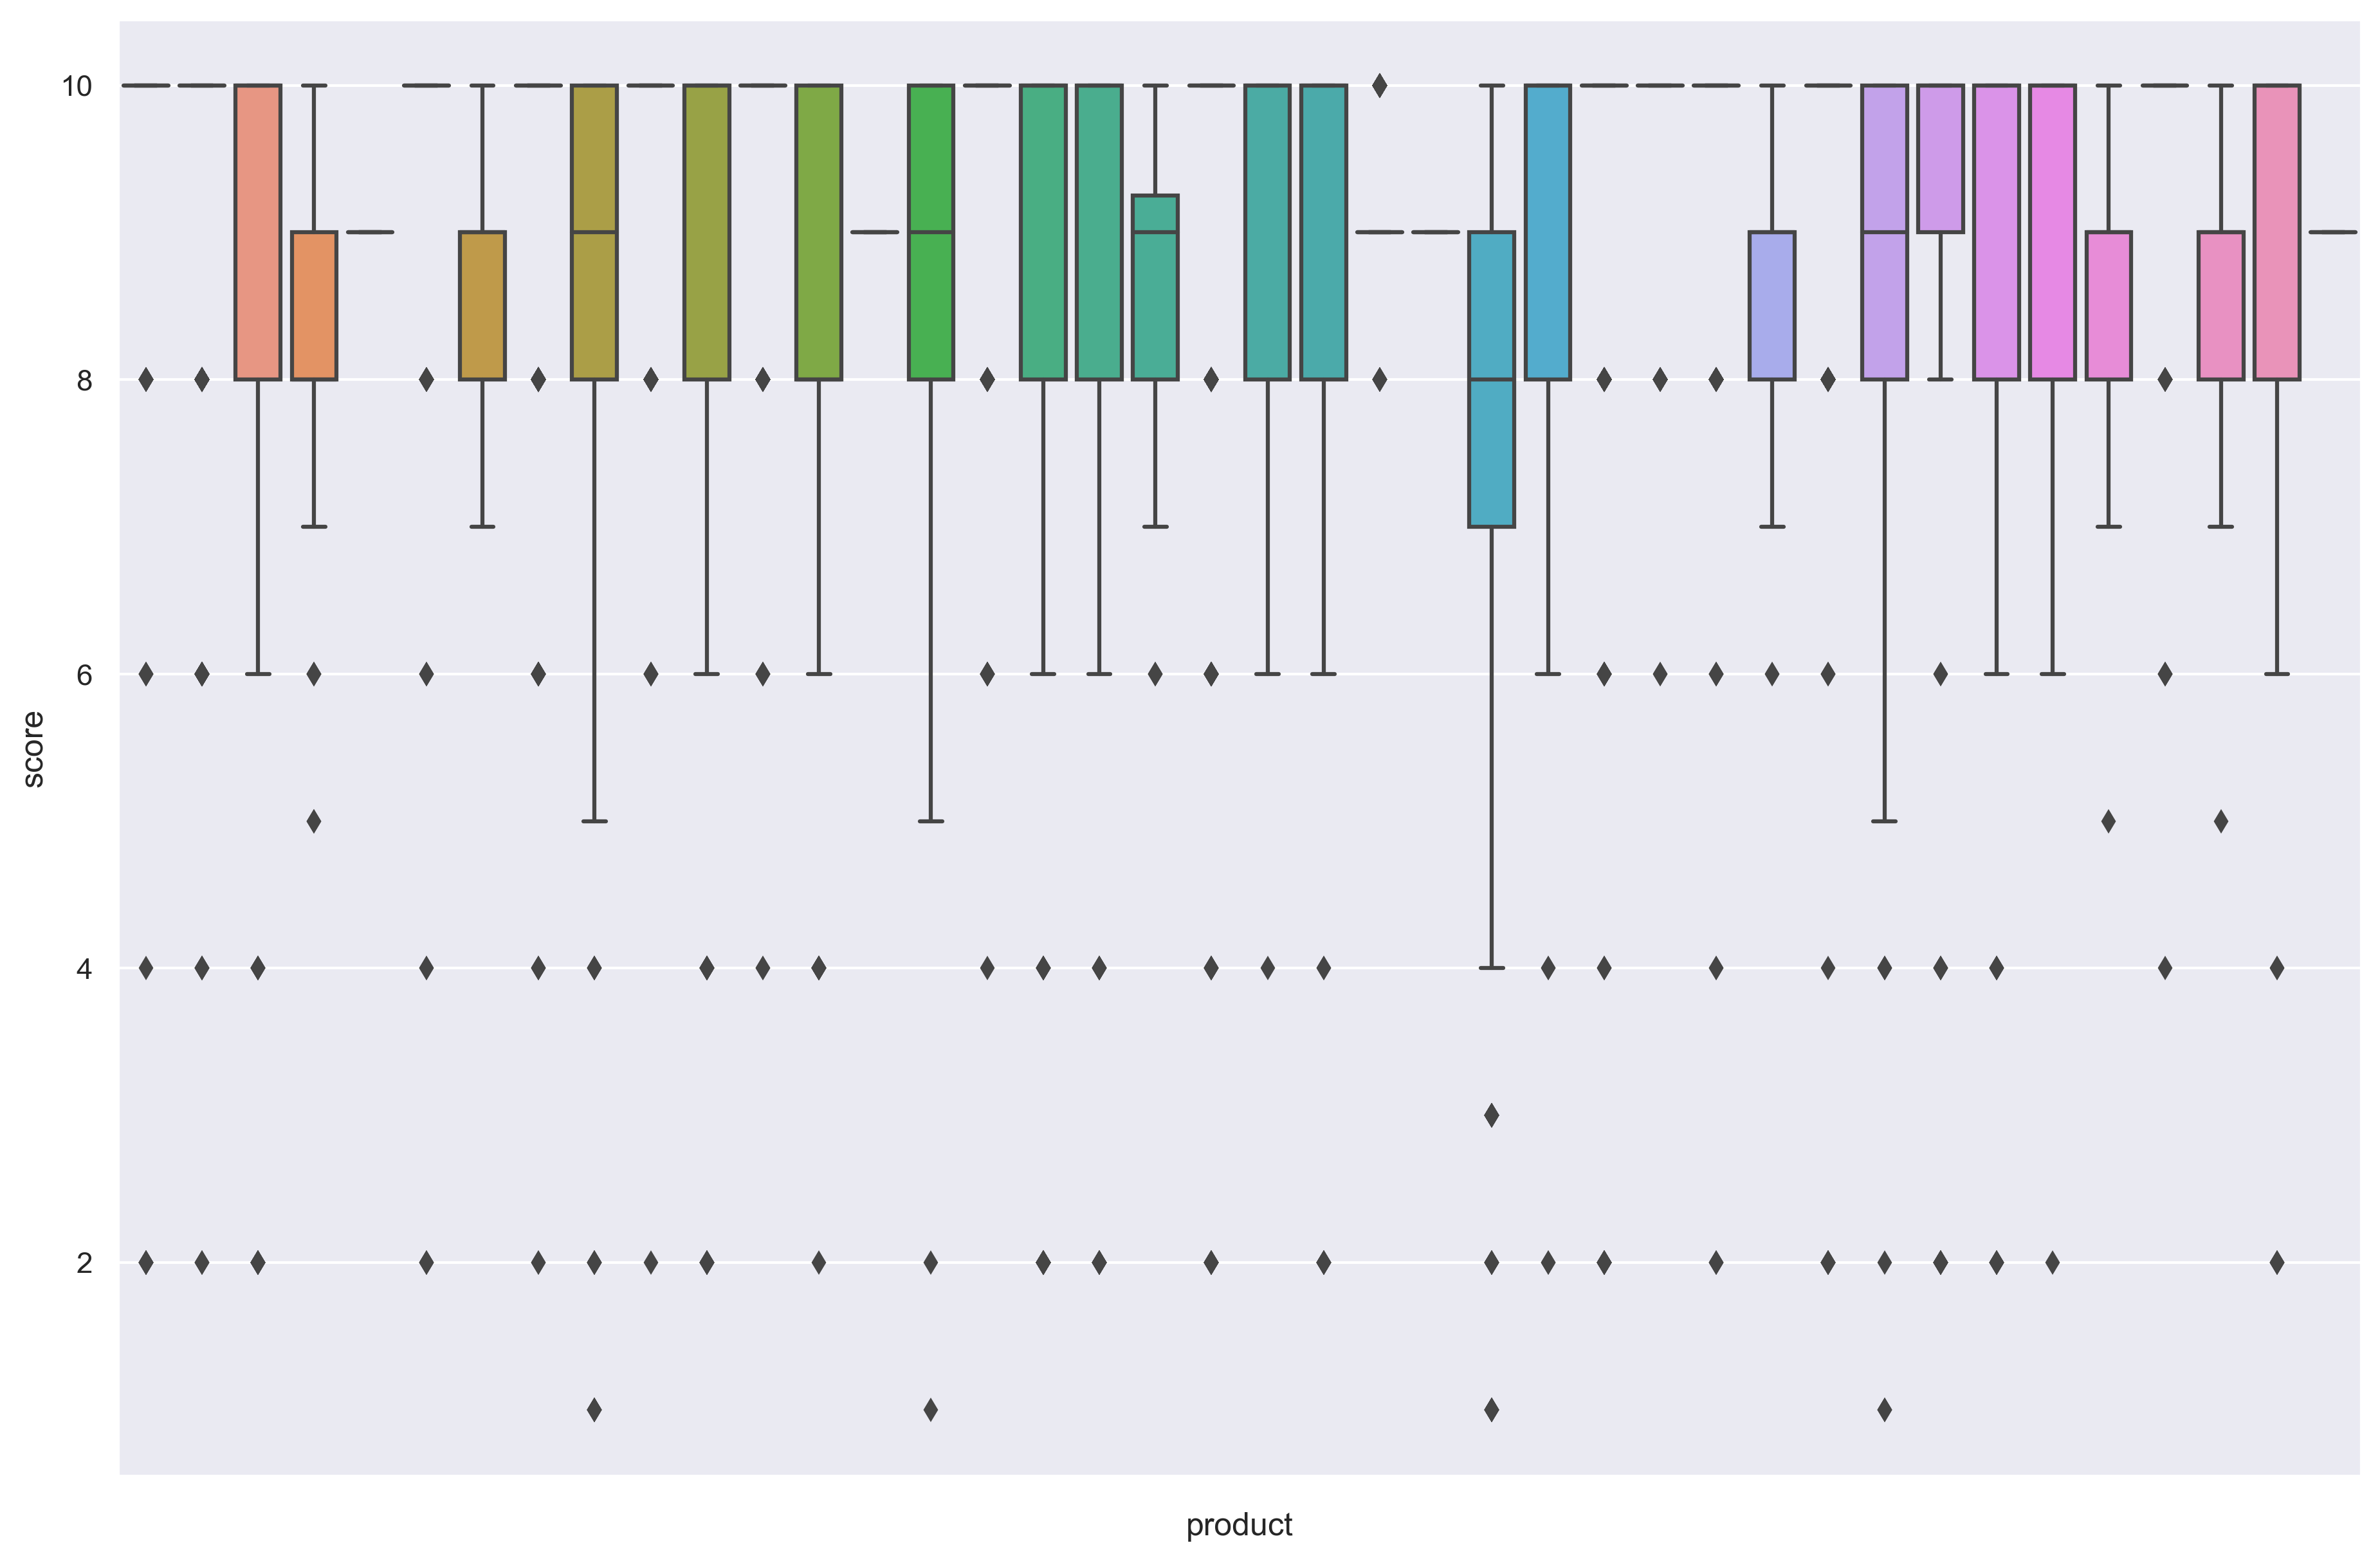

In [120]:
import matplotlib.pyplot as plt
top_items = data50.groupby('product').agg({'author': 'count'}).sort_values('author', ascending=False).index.values[:40]
most_rated = data50[data50['product'].isin(top_items)]
fig, axs = plt.subplots(1, 1, figsize = (15, 10), dpi=300)
sns.boxplot(data=most_rated, x='product', y = 'score', ax=axs).set(xticklabels=[])

[[]]

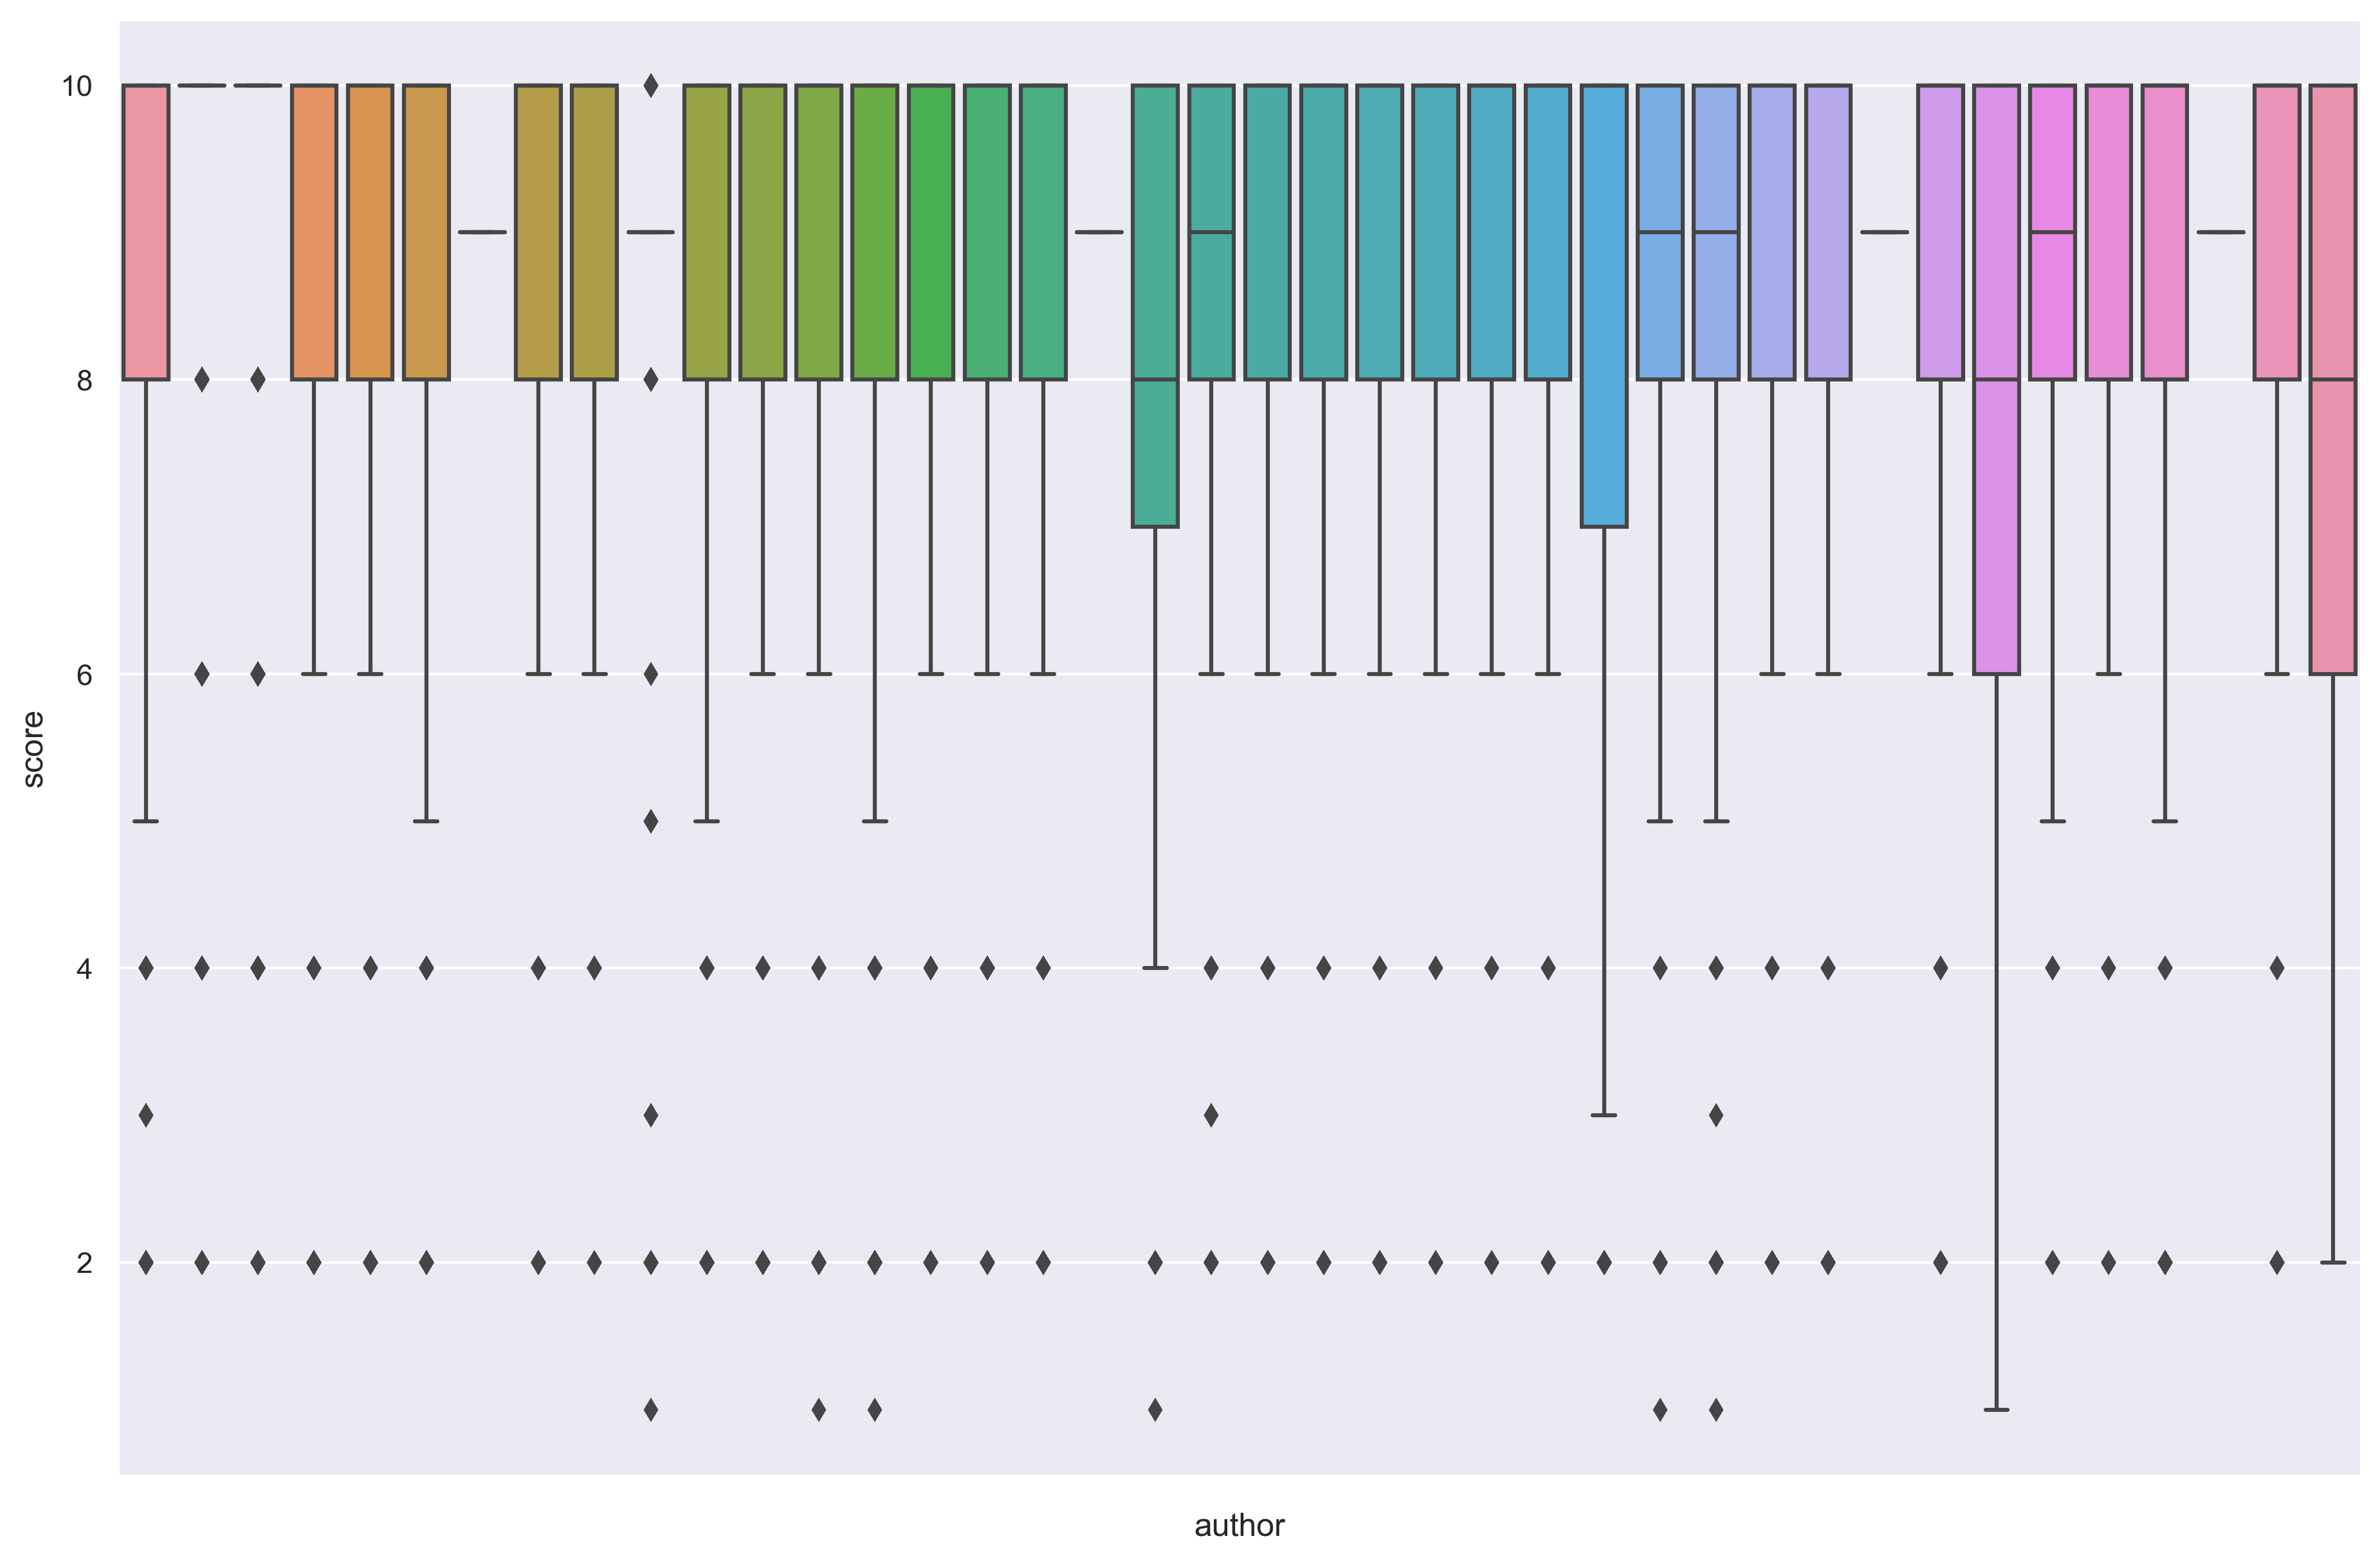

In [123]:
import matplotlib.pyplot as plt
top_users = data50.groupby('author').agg({'product': 'count'}).sort_values('product', ascending=False).index.values[:40]
most_rated = data50[data50['author'].isin(top_users)]
fig, axs = plt.subplots(1, 1, figsize = (15, 10), dpi=300)
sns.boxplot(data=most_rated, x='author', y = 'score', ax=axs).set(xticklabels=[])

#### Observation:  
<ol>
    <li><span style="color:#228B22">  For most rated products the ratings mostly fall in the range of 6- 10. But few ratings beyond the IQR range appears resonable and cannot be considered outliers.
    <li><span style="color:#228B22"> Similarly when grouped by users almost all users who rated many products rate mostly in the range 6-10 and rarely below six. Since this is uniform and consistent with product rating there is no need to impute these data points. 

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea">10. Try cross validation techniques to get better results.

In [71]:
from surprise.model_selection import cross_validate

result_svd = cross_validate(svd_algo, data_input_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True);
result_knn_II = cross_validate(knn_II_algo, data_input_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True);
result_knn_uu = cross_validate(knn_uu_algo, data_input_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True);

# print (result_svd)
# print (result_knn_II)
# print (result_knn_uu)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.3151  2.3556  2.3111  2.3329  2.3359  2.3301  0.0160  
MAE (testset)     1.6372  1.6698  1.6269  1.6493  1.6558  1.6478  0.0148  
Fit time          1.57    1.57    1.59    1.54    1.54    1.56    0.02    
Test time         0.05    0.05    0.05    0.05    0.05    0.05    0.00    
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing simil

In [69]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data_input_sp)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

2.271095265312052
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


#### Observation:  
<ol>
    <li><span style="color:#228B22">  With cross validation we find the mean rmse and mae has not changed significantly. The standard deviation is ~ 0.01 for both svd and knn based models. So the results obtained earlier are reliable. 
    <li><span style="color:#228B22"> With Grid search we find best parameters for training SVD

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 11. In what business scenario you should use popularity based Recommendation Systems ?

#### Ans:  
<ol>
    <li><span style="color:#228B22"> Popularity baed recommendation systems can be used in the scenario where the customer information is not available to give a user specific recommendation. 

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 12. In what business scenario you should use CF based Recommendation Systems ?

#### Ans:  
<ol>
    <li><span style="color:#228B22"> The Collabrative Filtering based recommendation system can be used in scenario we have sufficient data of the product/service the customer is looking for. 
    <li><span style="color:#228B22"> It can also be used in scenario where we have a historic record of the customers preferences, choices and feedback on different products. 

### <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#0e92ea"> 13. What other possible methods can you think of which can further improve the recommendation for different users ?

#### Ans:  
<ol>
    <li><span style="color:#228B22"> We can implement content based recommended system after collecting comments from the user. 
    <li><span style="color:#228B22"> A hybrid recommendation system combining popularity, content based and CF based might give better experience to all types of users. 
    <li><span style="color:#228B22"> The data can be collected more carefully with proper encoding to avoid missing or corrupted data. 
    